In [1]:
print 'Hello World!'

Hello World!


The exercise is done  based on the following steps, <Step-1> Data mining and extraction:- This step involves reading the train_search.csv and hotel.csv and converting the data into a single table, globalTrain.csv. This process is executed using "join" using python pandas. However, here due to the size of data, I used mysql to generate the table. <Step-2> Identifying features and target in the test and training data. The features are extracted from the globalTrain and the target is the "Segment". This step involves the python pandas library and the following dataframes are created: X_train (features of trainigng data), y_train (target of training data), X_test (features of test dat i.e. evaluation.csv) and y_test (target of test data i.e. our final objective, the y_test is generated at the end). <Step-3> Performs cross-validation based F1 score tests and build the classifier models. Then fit the training data in the classifier. <Step-4> Predict y_test from the classifier fits.

Read train_search.csv and store the data in a data frame named, "searchData"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Tell iPython to include plots inline in the notebook
%matplotlib inline
# Read dataset
searchData = pd.read_csv("train_search.csv")
#print "Dataset has {} rows, {} columns".format(*searchData.shape)
#print searchData.head() # print the first 5 rows
print "Successfull!!"

Successfull!!


/home/akansha/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Read Hotel.csv and store the data in a data frame named, "hotelData"

In [3]:
# Read dataset
hotelData = pd.read_csv("Hotel.csv")
#print "Dataset has {} rows, {} columns".format(*hotelData.shape)
#print hotelData.head() # print the first 5 rows
print "Successfull!!"

Successfull!!


In [ ]:
from sklearn import svm, grid_search, datasets
iris = datasets.load_iris()
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svr = svm.SVC()
clf = grid_search.GridSearchCV(svr, parameters)
clf.fit(iris.data, iris.target)
print iris.data.head()

Now join the two data frames based on "HotelCOde" and develop a single data frame "globalData". in this process also create a csv file, "globalTrain.csv". Due to the size of searchData and computational limitations on my laptop I did not execute this join, rather used mysql to execute the join.

In [ ]:
#globalData = searchData.join(hotelData, on='HotelCode')
#print "Dataset has {} rows, {} columns".format(*globalData.shape)
#print globalData.head() # print the first 5 rows


In [4]:
globalData = pd.read_csv("globalTrain.csv")
#print globalData.head() # print the first 5 rows
globalData=globalData.rename(columns = {' HotelCode':'HotelCode'})
globalData=globalData.rename(columns = {' Age':'Age'})
globalData=globalData.rename(columns = {' Gender':'Gender'})
globalData=globalData.rename(columns = {' Number of Rooms':'Number of Rooms'})
globalData=globalData.rename(columns = {' Check in date':'Check in date'})
globalData=globalData.rename(columns = {' Check Out Date':'Check Out Date'})
globalData=globalData.rename(columns = {' Seen Price':'Seen Price'})
globalData=globalData.rename(columns = {' isClicked':'isClicked'})
globalData=globalData.rename(columns = {' isBooked':'isBooked'})
globalData=globalData.rename(columns = {' Segment':'Segment'})
#print globalData.dtypes;
globalData['Booking Date'] =  pd.to_datetime(globalData['Booking Date'])
globalData['Check in date'] =  pd.to_datetime(globalData['Check in date'])
globalData['Check Out Date'] =  pd.to_datetime(globalData['Check Out Date'])
globalData['isClicked'] =  globalData['isClicked'].astype(str)
globalData['isBooked'] =  globalData['isBooked'].astype(str)

globalData['Stay Period'] = (globalData['Check Out Date'] - globalData['Check in date'])/np.timedelta64(1, 'D');
globalData['Travel Gap'] = (globalData['Check in date'] - globalData['Booking Date'])/np.timedelta64(1, 'D');
#print globalData.dtypes;
#print "Dataset has {} rows, {} columns".format(*globalData.shape)
#print globalData.head() # print the first 5 rows
print "Successfull!!"

Successfull!!


From the data, it is evident that the segment depends on,
1> Age (3), 2> Gender (4), 3> Number of rooms (5), 4> Seen price (8), 5> isCLicked (9), 6> isBooked (10), 7> Star Rating (16), 8> Trip Adviser Rating (17), 9> Stay period (Difference in days between Check out date and Check in date) (18), 10 > Travel Gap  (Difference in days between booking date and check in date) (19).
Therefore, there are 10 features as mentioned above. Some of the features have a string/object value, convert those to discretes ones an zeros. 

In [18]:
#Now separate training data
X_train=globalData.iloc[:,[3,4,5,8,9,10,16,17,18,19]];
#X_train=globalData.iloc[:,[3,5,8,16,18]];
#X_train=globalData.iloc[:,[3,4,8,16,18]];
#X_train=globalData.iloc[:,[3,4,18]];
#X_train=globalData.iloc[:,[3,4,5,8,9,16,17,18,19]];
X_train['Gender'] = X_train['Gender'].replace(['male', 'female'], [1, 0])
X_train['isClicked'] = X_train['isClicked'].replace(['True', 'False'], [1, 0])
X_train['isBooked'] = X_train['isBooked'].replace(['True', 'False'], [1, 0])
X_train[X_train < 0] = 0
#print X_train.head();
print X_train.dtypes;
#print X_train['Travel Gap'];
print "Successful!!"

/home/akansha/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/akansha/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/akansha/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/sta

Age                     int64
Gender                  int64
Number of Rooms         int64
Seen Price              int64
isClicked               int64
isBooked                int64
Star Rating             int64
TripAdvisor Rating    float64
Stay Period           float64
Travel Gap            float64
dtype: object
Successful!!


In [19]:
#Now separate training data - Target
y_train=globalData.iloc[:,[11]];
y_train['Segment'] = y_train['Segment'].replace(['backpacker', 'couple','family'], [1, 3, 2])
#print y_train.head();
#print y_train.dtypes;
print "Successfull!!"

Successfull!!


/home/akansha/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X_new = SelectKBest(chi2).fit_transform(X_train, y_train)
print X_new.shape
print X_new.head()

In [ ]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
print sel.fit_transform(X_train)[0,:]
print X_train.head(n=1)

In [20]:
bigdata = pd.concat([X_train, y_train], axis=1)
#bigdata=X_train.append(y_train,ignore_index = True)
#print bigdata.corr().head();
#print bigdata.dtypes;
print "Successfull!!"
#print bigdata.corr()

Successfull!!


In [21]:
#conda install seaborn

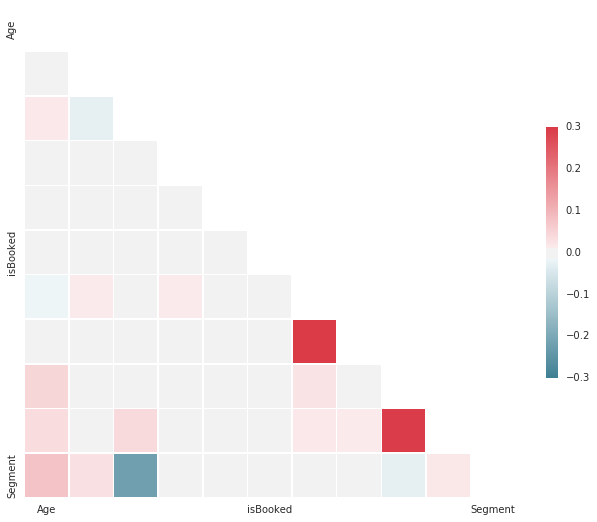

In [26]:
from string import letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Compute the correlation matrix
corr = bigdata.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

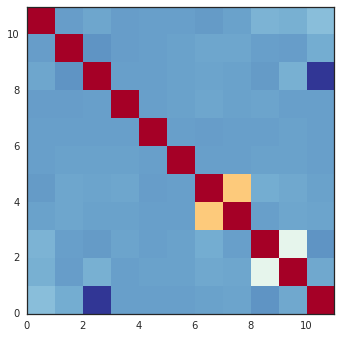

In [31]:
import statsmodels.api as sm
corr_matrix = np.corrcoef(bigdata.T)
sm.graphics.plot_corr(corr_matrix, xnames=bigdata.columns.values)
plt.show()

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_train)
# Print the components and the amount of variance in the data contained in each dimension
print pca.components_
print pca.explained_variance_ratio_

[[  5.40301043e-08   1.95380112e-09   4.98571190e-10  -1.00000000e+00
    8.09557631e-10  -2.33086186e-10  -5.23225422e-09  -1.57612211e-09
   -9.57986790e-09   8.20738300e-08]
 [  1.04019990e-02  -4.78484679e-05   3.06806328e-04   8.25246189e-08
    3.86843950e-05   3.31918879e-06   2.01061826e-04   1.27154302e-04
    1.05488107e-02   9.99890177e-01]]
[  9.99999999e-01   1.05329442e-09]


[[  3.36151357e-07   4.92876201e-03  -4.79629764e-04   9.51453093e-12
   -6.52359245e-06   2.48902640e-06  -1.87044124e-05   1.17605783e-05
    1.87481259e-06   3.08764281e-07]
 [  4.71851194e-06  -7.28788971e-06   3.05799118e-07  -5.75857391e-12
   -3.64656127e-07  -2.74219249e-08   7.21049322e-05   3.65738088e-05
    1.41904654e-04  -4.65602447e-05]
 [ -8.19650284e-06  -1.28346415e-05  -7.50348359e-06  -1.25780591e-11
    6.04328062e-08   1.55306441e-07  -1.43372893e-04  -8.41975958e-05
    1.32040639e-03  -9.01300991e-06]
 [  3.14473108e-06  -4.34442739e-05   2.12306158e-05  -1.35745413e-11
   -1.17487213e-05  -1.30258118e-06   2.74125729e-03   1.42941023e-03
    4.60400839e-05   1.92748688e-07]
 [ -3.23639905e-07  -9.11486603e-08   4.58191252e-08  -1.47008155e-09
   -2.69716126e-08  -2.95175859e-09   6.26963751e-06   3.26696552e-06
    4.10188121e-07   1.06183628e-08]
 [ -1.68761734e-04  -3.78880882e-05   3.87207721e-06  -6.42622662e-12
   -6.07314221e-08  -3.38952314e-08   3.18575

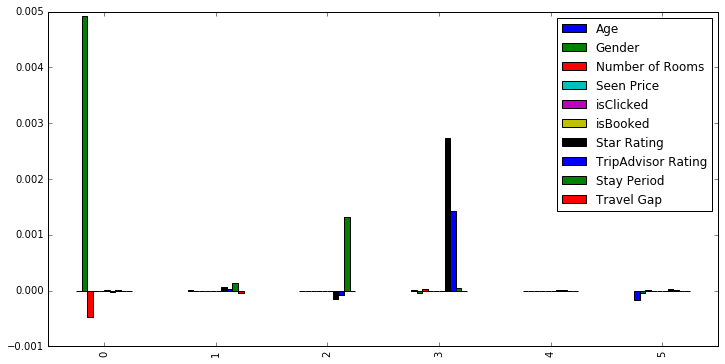

In [12]:
from sklearn.decomposition import FastICA
ica = FastICA(n_components=6, random_state=1)
ica.fit(X_train)
# Print the independent components
print ica.components_
pd.DataFrame(ica.components_, columns=X_train.columns).plot(kind = 'bar', figsize = (12, 6))

The best way to test a classifier model is cross-validation. In cross-validation an input set is brocken into training and testing set. The testting set is used to test the model built using the training set. And then the F1 score is computed. The next block of code is used to split the input data randomly into traing set and testing set. After the block is executed a set of training and test features and target are available for cross validation. The variables generated are X_train_cv, y_train_cv, X_test_cv and y_test_cv.

In [97]:
from sklearn.cross_validation import train_test_split
# First, decide how many training vs test samples you want
num_test = 40000
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_train, y_train, test_size=num_test)
print "Training set: {} samples".format(X_train_cv.shape[0])
print "Test set: {} samples".format(X_test_cv.shape[0])

Training set: 122848 samples
Test set: 40000 samples


The next block of code is a method that fits a training data into an inputted classifier and also returns and prints the time it takes to train the model.

In [87]:
import time as time
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
def train_classifier(clf, X_train, y_train):
    print "Training {}...".format(clf.__class__.__name__)
    start = time.time()
    clf.fit(X_train, y_train)
    end = time.time()
    print "Done!\nTraining time (secs): {:.3f}".format(end - start)
    return (end - start)


A decision tree classifier is initiated and a classifier model is built and fittedwith the cross-validation training features and target.

In [103]:
# Fit model to training data
#Best classifier
import time as time
from sklearn.tree import DecisionTreeClassifier
#clf = DecisionTreeClassifier(random_state=0)
#clf = DecisionTreeClassifier(min_samples_split= 2, max_leaf_nodes= 32, criterion= 'entropy',
#                             max_depth = 9, min_samples_leaf=179)
#clf = DecisionTreeClassifier(min_samples_split= 21, max_leaf_nodes= 20, criterion= 'gini',
#                             max_depth = None, min_samples_leaf=11)

from sklearn import svm, grid_search, naive_bayes
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
from sklearn import linear_model

#dtr_params = {'criterion':("gini","entropy")}
#dtc2 = DecisionTreeClassifier(random_state=0)
#lr = linear_model.LogisticRegression()
#clf = grid_search.GridSearchCV(dtc2, dtr_params)

#dtr_params = {'criterion':("gini","entropy"),'presort':("True","False"),
#              'min_weight_fraction_leaf':(0,0.25,0.5), 'min_samples_leaf':(1,2,3),
#              'min_samples_split':(2,4,8,16,32),'min_samples_split':(2,4,8,16), 
#              'max_features':("auto","sqrt","log2"),'max_depth':np.arange(1,5,1)}
#dtc2 = DecisionTreeClassifier(random_state=0)
#clf = grid_search.GridSearchCV(dtc2, dtr_params)   

#from  sklearn.ensemble import RandomForestClassifier
#clf1 = RandomForestClassifier(n_estimators=20)
# use a full grid over all parameters
#param_grid = {#"max_depth": [3, None],
              #"max_features": [1, 3, 10],
              #"min_samples_split": [1, 3, 10],
              #"min_samples_leaf": [1, 3, 10],
              #"bootstrap": [True, False],
              # "criterion": ["gini", "entropy"]
              #  "n_estimators": [5, 20,30]}
#clf = GridSearchCV(clf1, param_grid=param_grid)

#parameters={'C' : [.005,.05,.5,1.,10.,100.,],
#'fit_intercept' : [True, False],
#'class_weight': [ None,'balanced'],
#'random_state' : [None,42],
#'penalty': ['l1', 'l2']
#}
#clf = svm.SVC()

#SVC does not work
#parameters = {'kernel':('linear', 'rbf'), 'C':[1, 20]}
#svr = svm.SVC()
#clf = SVC(kernel="linear", C=1.0)

#Bad results
#clf= GaussianNB()

#clf=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
#    decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
#    max_iter=-1, probability=False, random_state=None, shrinking=True,
#    tol=0.001, verbose=False)

#from sklearn.linear_model import LogisticRegression
#clf = LogisticRegression()


#from sklearn.linear_model import SGDRegressor
#clf = SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
#             fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
#             loss='squared_loss', n_iter=5, penalty='l2', power_t=0.25,
#             random_state=None, shuffle=True, verbose=0, warm_start=False)

#from sklearn.naive_bayes import BernoulliNB
#clf = BernoulliNB()

#from sklearn.linear_model import PassiveAggressiveClassifier
#clf=PassiveAggressiveClassifier()

#Works
#from sklearn.neighbors import KNeighborsClassifier
#clf = KNeighborsClassifier(n_neighbors=35)

#Works
#from  sklearn.ensemble import RandomForestClassifier
#clf = RandomForestClassifier(criterion='entropy',n_estimators=100, max_features=None,random_state=None)
#clf = RandomForestClassifier(n_estimators=20,min_samples_split=4)


#Works
#from  sklearn.ensemble import RandomForestClassifier
#clf = RandomForestClassifier(n_estimators=100)
#clf = RandomForestClassifier(n_estimators=100,max_features=None)

#Works
from  sklearn.ensemble import AdaBoostClassifier
#clf = AdaBoostClassifier(n_estimators=50)
clf = AdaBoostClassifier(n_estimators=60,learning_rate=0.65)

#from sklearn.tree import DecisionTreeClassifier
#clf2 = DecisionTreeClassifier(min_samples_split= 2, max_leaf_nodes= 20, criterion= 'gini',
#                             max_depth = None, min_samples_leaf=1)
#clf = AdaBoostClassifier(base_estimator=clf2,n_estimators=1,learning_rate=18,algorithm='SAMME')


#clf1 = AdaBoostClassifier()
#param_grid = { "n_estimators": [5, 20,30]}
#lf = GridSearchCV(clf1, param_grid=param_grid)

#from  sklearn.ensemble import RandomForestClassifier
#clf1 = RandomForestClassifier(n_estimators=20)
#clf = AdaBoostClassifier(base_estimator=clf1,n_estimators=50)

#Works
#from  sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#clf = LinearDiscriminantAnalysis(solver='eigen', shrinkage='auto', tol=0.0001)

#Works
#from  sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
#clf = QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0, store_covariances=False, tol=0.000000001)

train_classifier(clf, X_train_cv, y_train_cv) # note: using entire training set here
#print clf # you can inspect the learned model by printing it

print "Successfull!!"

Training AdaBoostClassifier...
Done!
Training time (secs): 4.686
Successfull!!


/home/akansha/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [7]:
from scipy.stats import randint as sp_randint
from sklearn.svm import SVC
from sklearn import svm, grid_search, naive_bayes
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
from sklearn import linear_model
print("-- Grid Parameter Search via 10-fold CV")

# set of parameters to test
#param_dist = {"criterion": ["gini", "entropy"],
#              "min_samples_split": [2,10,20],
#              "max_depth": [None, 2, 5, 10],
#              "min_samples_leaf": [1,5,10],
#              "max_leaf_nodes": [None, 5, 10, 20],
#              }
#dt = DecisionTreeClassifier()

#param_dist = {"criterion": ["gini", "entropy"],
#              "min_samples_split": sp_randint(1, 100),
#              "max_depth": sp_randint(1, 20),
#              "min_samples_leaf": sp_randint(1, 200),
#              "max_leaf_nodes": sp_randint(2, 100),              
#              }
#dt = DecisionTreeClassifier()

# build a classifier
#dt = RandomForestClassifier(n_estimators=20)
# specify parameters and distributions to sample from
#param_dist = {"max_depth": [3, None],
#              "max_features": sp_randint(1, 4),
#              "min_samples_split": sp_randint(1, 11),
#              "min_samples_leaf": sp_randint(1, 11),
#              "bootstrap": [True, False],
#              "criterion": ["gini", "entropy"]}
#n_iter_search = 20

#from  sklearn.ensemble import AdaBoostClassifier
#from sklearn.tree import DecisionTreeClassifier
#clf2 = DecisionTreeClassifier(min_samples_split= 2, max_leaf_nodes= 20, criterion= 'gini',
#                             max_depth = None, min_samples_leaf=1)
#dt = AdaBoostClassifier(base_estimator=clf2)
# specify parameters and distributions to sample from
#param_dist = {"n_estimators": sp_randint(1, 100),
#              "learning_rate": sp_randint(1, 20),
#              "algorithm": ["SAMME", "SAMME.R"]}

from  sklearn.ensemble import AdaBoostClassifier
dt = AdaBoostClassifier()
# specify parameters and distributions to sample from
param_dist = {"n_estimators": [20, 40,60,80,100],
              "learning_rate": [ 0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
              "algorithm": ["SAMME", "SAMME.R"]}

#dt=SVC();
#param_dist = [
#  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
#  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
# ];

#from  sklearn.linear_model import SGDClassifier
#dt = SGDClassifier()
#param_dist = {"loss": ["hinge", "log", "modified_huber", "squared_hinge", "perceptron"],
#              "penalty": [None, "l2", "l1", "elasticnet"],
#              "alpha": [0.0001, 0.001, 0.1],
#              "n_iter": [5, 10, 50],              
#              }

#from sklearn.linear_model import LogisticRegression
#dt = LogisticRegression()
#param_dist = {"penalty": ["l2", "l1"],
#              "intercept_scaling": [1.0, 5.0, 10], 
#              "class_weight": ["dict", "optional"],
#              "solver": ["newton-cg", "lbfgs", "liblinear", "sag"],
#              "multi_class": [ "ovr", "multinomial"],
#              }

#features = ["Age", "Number of Rooms",
#            "Seen Price", "Star Rating"]
#features = ["Age", "Gender","Number of Rooms",
#            "Seen Price","isClicked","isBooked","Star Rating", "TripAdvisor Rating","Stay Period","Travel Gap"]
features = ["Age","Gender","Seen Price","Star Rating","Stay Period"]

y_arr = y_train["Segment"]
X_arr = X_train[features]
#ts_gs = run_gridsearch(X_arr, y_arr, dt, param_dist, cv=10)
#ts_rs = run_randomsearch(X_arr, y_arr, dt, param_dist, cv=10,n_iter_search=5000)

-- Grid Parameter Search via 10-fold CV


In [108]:
from time import time
def run_gridsearch(X, y, clf, param_grid, cv=5):
    """Run a grid search for best Decision Tree parameters.

    Args
    ----
    X -- features
    y -- targets (classes)
    cf -- scikit-learn Decision Tree
    param_grid -- [dict] parameter settings to test
    cv -- fold of cross-validation, default 5

    Returns
    -------
    top_params -- [dict] from report()
    """
    grid_search = GridSearchCV(clf,
                               param_grid=param_grid,
                               cv=cv, verbose=10)
    start = time()
    grid_search.fit(X, y)

    print(("\nGridSearchCV took {:.2f} "
           "seconds for {:d} candidate "
           "parameter settings.").format(time() - start,
                len(grid_search.grid_scores_)))

    top_params = report(grid_search.grid_scores_, 3)
    return  top_params

In [28]:
def run_randomsearch(X, y, clf, para_dist, cv=5,
                     n_iter_search=20):
    """Run a random search for best Decision Tree parameters.

    Args
    ----
    X -- features
    y -- targets (classes)
    cf -- scikit-learn Decision Tree
    param_dist -- [dict] list, distributions of parameters
                  to sample
    cv -- fold of cross-validation, default 5
    n_iter_search -- number of random parameter sets to try,
                     default 20.

    Returns
    -------
    top_params -- [dict] from report()
    """
    random_search = RandomizedSearchCV(clf,
                        param_distributions=param_dist,
                        n_iter=n_iter_search, verbose=10)

    start = time()
    random_search.fit(X, y)
    print(("\nRandomizedSearchCV took {:.2f} seconds "
           "for {:d} candidates parameter "
           "settings.").format((time() - start),
                               n_iter_search))

    top_params = report(random_search.grid_scores_, 3)
    return  top_params



In [29]:
from time import time
from operator import itemgetter
from scipy.stats import randint
def report(grid_scores, n_top=3):
    """Report top n_top parameters settings, default n_top=3.

    Args
    ----
    grid_scores -- output from grid or random search
    n_top -- how many to report, of top models

    Returns
    -------
    top_params -- [dict] top parameter settings found in
                  search
    """
    top_scores = sorted(grid_scores,
                        key=itemgetter(1),
                        reverse=True)[:n_top]
    for i, score in enumerate(top_scores):
        print("Model with rank: {0}".format(i + 1))
        print(("Mean validation score: "
               "{0:.3f} (std: {1:.3f})").format(
               score.mean_validation_score,
               np.std(score.cv_validation_scores)))
        print("Parameters: {0}".format(score.parameters))
        print("")

    return top_scores[0].parameters



In [ ]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.cross_validation import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(y_train, 2),
              scoring='accuracy')
rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()
print "Successfull!!"

The following block and method is used to predict target for an input features set. This also returns the f_score based on the predicted target and the actual target.

In [17]:
#Predict on training set and compute F1 score
from sklearn.metrics import f1_score
def predict_labels(clf, features, target):
    print "Predicting labels using {}...".format(clf.__class__.__name__)
    start = time.time()
    y_pred = clf.predict(features)
    end = time.time()
    print "Done!\nPrediction time (secs): {:.3f}".format(end - start)
    #return f1_score(target.values, y_pred, pos_label='yes')
    return f1_score(target.values, y_pred) , (end - start)


The following block of code is used to see the f1 score of the training data used as a test set and the cross-validation test set.

In [104]:
#print y_train.head()
#print X_train.head()
train_cv_f1_score = predict_labels(clf, X_train_cv, y_train_cv)
print "F1 score for training set: {}".format(train_cv_f1_score)
# Predict on test data
test_cv_f1_score = predict_labels(clf, X_test_cv, y_test_cv)
print "F1 score for test set: {}".format(test_cv_f1_score)

Predicting labels using AdaBoostClassifier...
Done!
Prediction time (secs): 1.848
F1 score for training set: (0.60420237473109606, 1.8482379913330078)
Predicting labels using AdaBoostClassifier...
Done!
Prediction time (secs): 0.562

/home/akansha/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:756: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
/home/akansha/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:756: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1


F1 score for test set: (0.60992231970116939, 0.5618669986724854)


In [19]:
globalTestData = pd.read_csv("globalTest.csv")
#print globalTestData.head() # print the first 5 rows
globalTestData=globalTestData.rename(columns = {' HotelCode':'HotelCode'})
globalTestData=globalTestData.rename(columns = {' Age':'Age'})
globalTestData=globalTestData.rename(columns = {' Gender':'Gender'})
globalTestData=globalTestData.rename(columns = {' Number of Rooms':'Number of Rooms'})
globalTestData=globalTestData.rename(columns = {' Check in date':'Check in date'})
globalTestData=globalTestData.rename(columns = {' Check Out Date':'Check Out Date'})
globalTestData=globalTestData.rename(columns = {' Seen Price':'Seen Price'})
globalTestData=globalTestData.rename(columns = {' isClicked':'isClicked'})
globalTestData=globalTestData.rename(columns = {' isBooked':'isBooked'})
globalTestData=globalTestData.rename(columns = {' Segment':'Segment'})
#print globalTestData.dtypes;
globalTestData['Booking Date'] =  pd.to_datetime(globalTestData['Booking Date'])
globalTestData['Check in date'] =  pd.to_datetime(globalTestData['Check in date'])
globalTestData['Check Out Date'] =  pd.to_datetime(globalTestData['Check Out Date'])
globalTestData['isClicked'] =  globalTestData['isClicked'].astype(str)
globalTestData['isBooked'] =  globalTestData['isBooked'].astype(str)

globalTestData['Stay Period'] = (globalTestData['Check Out Date'] - globalTestData['Check in date'])/np.timedelta64(1, 'D');
globalTestData['Travel Gap'] = (globalTestData['Check in date'] - globalTestData['Booking Date'])/np.timedelta64(1, 'D');
#print globalTestData.dtypes;
#print "Dataset has {} rows, {} columns".format(*globalTestData.shape)
#print globalTestData.head() # print the first 5 rows
print "Successfull!!"

Successfull!!


In [ ]:
def string_to_date(my_string):
    if '-' in my_string:
        return datetime.datetime.strptime(my_string, '%d-%m-%y')
    elif my_string.isdigit():
        return datetime.datetime.strptime(my_string, '%d%m%y')
    elif my_string.isalnum():
        return datetime.datetime.strptime(my_string, '%d%b%Y')

In [105]:
#Now separate training data
#X_test=globalTestData.iloc[:,[3,4,5,8,9,10,16,17,18,19]];
#X_test=globalTestData.iloc[:,[3]];
#X_test=globalTestData.iloc[:,[3,4,5,8,9,16,17,18,19]];
X_test=globalTestData.iloc[:,[3,5,8,16,18]];
#X_test['Gender'] = X_test['Gender'].replace(['male', 'female'], [1, 0])
#X_test['isClicked'] = X_test['isClicked'].replace(['True', 'False'], [1, 0])
#X_test['isBooked'] = X_test['isBooked'].replace(['True', 'False'], [1, 0])
X_test[X_test < 0] = 0
#print X_test.head();
#print X_test.dtypes;
#print X_train['Travel Gap'];
print "Successfull!!"

Successfull!!


/home/akansha/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [106]:
# Fit model to training data
#Best classifier
#clf = DecisionTreeClassifier(random_state=0)
train_classifier(clf, X_train, y_train) # note: using entire training set here
y_pred = clf.predict(X_test)
#print "Dataset has {} rows, {} columns".format(*y_pred.shape)
#print y_pred.head()
print "Successfull!!"

Training AdaBoostClassifier...
Done!
Training time (secs): 5.786
Successfull!!


/home/akansha/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#print y_pred
#y_pred = y_pred.reshape((-1,1))
#df_pred = pd.DataFrame({'Segment':y_pred[:,0]})
#print df_pred.head()
#print "Dataset has {} rows, {} columns".format(*df_pred.shape)

In [107]:
y_pred = y_pred.reshape((-1,1))
df_output= pd.DataFrame({'Search ID':globalTestData['Search ID'],'Segment':y_pred[:,0]})
print df_output.head()
print "Dataset has {} rows, {} columns".format(*df_output.shape)
df_output.to_csv('akansha_out15.csv',columns=None, header=False)

   Search ID  Segment
0    1000000        3
1    1000001        3
2    1000002        3
3    1000003        3
4    1000004        3
Dataset has 297321 rows, 2 columns
